In [2]:
from tensorflow import keras

model = keras.models.load_model("lstm_autoencoder_model.keras")


c:\Users\bimba\.vscode\Megaminds_Assignment\megamassign\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
import numpy as np

test_data = np.load("test_data.npy")
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step


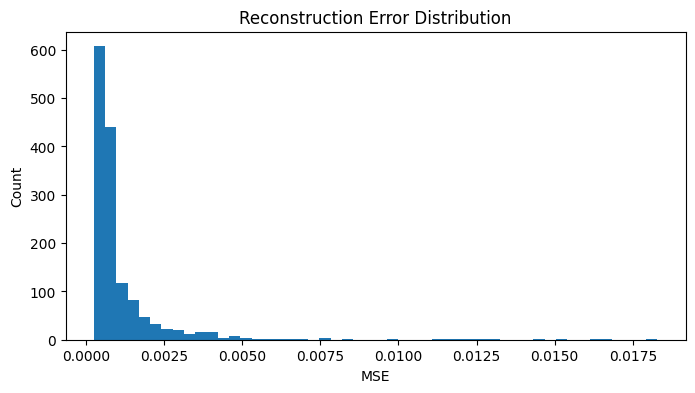

In [4]:
# Phase 4 — Anomaly Detection
import numpy as np
import matplotlib.pyplot as plt

# Reconstruct the sequences using the trained autoencoder
reconstructions = model.predict(test_data)

# Compute Mean Squared Error for each sequence
mse = np.mean(np.power(test_data - reconstructions, 2), axis=(1,2))

# Plot distribution of reconstruction errors
plt.figure(figsize=(8,4))
plt.hist(mse, bins=50)
plt.title("Reconstruction Error Distribution")
plt.xlabel("MSE")
plt.ylabel("Count")
plt.show()


In [5]:
threshold = np.mean(mse) + 3*np.std(mse)
print("Threshold:", threshold)


Threshold: 0.005836974803607129


In [6]:
anomalies = mse > threshold
print("Total anomalies detected:", np.sum(anomalies))


Total anomalies detected: 21


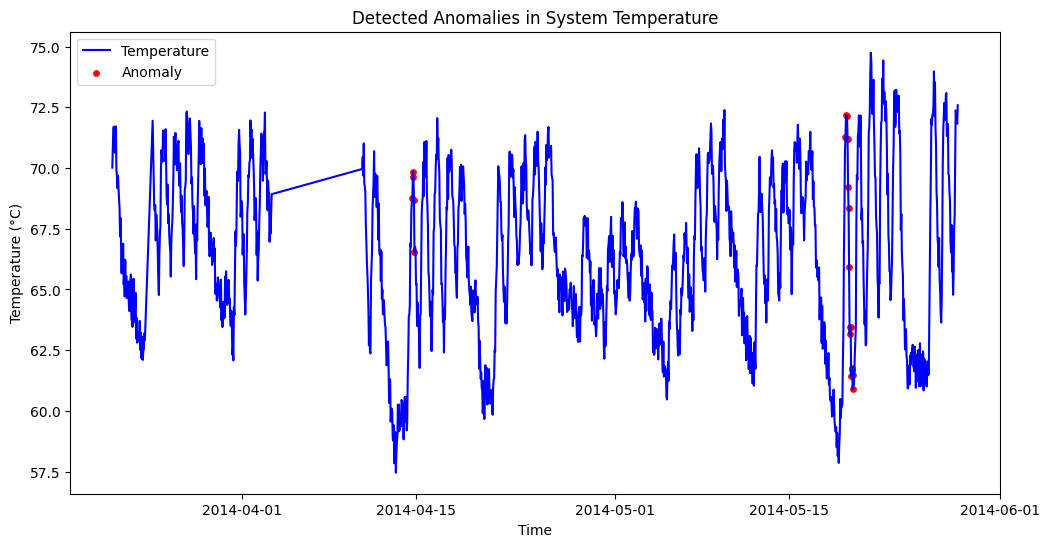

In [8]:
# Load the original temperature time series again
import pandas as pd

data = pd.read_csv(r"C:\Users\bimba\.vscode\Megaminds_Assignment\megamassign\NAB-master\data\realKnownCause\ambient_temperature_system_failure.csv")
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.sort_values(by='timestamp')

# Just like before, we’ll extract only the test segment length
test_time = data['timestamp'].values[-len(test_data):]
test_values = data['value'].values[-len(test_data):]

# Plot it
plt.figure(figsize=(12,6))
plt.plot(test_time, test_values, label="Temperature", color='blue')
plt.scatter(test_time[anomalies], test_values[anomalies], color='red', label="Anomaly", s=15)
plt.title("Detected Anomalies in System Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


In [9]:
# Compute reconstruction error for all test samples
reconstructions = model.predict(test_data)
mse = np.mean(np.power(test_data - reconstructions, 2), axis=(1,2))

# Print some summary stats
print("Mean reconstruction error:", np.mean(mse))
print("Median reconstruction error:", np.median(mse))
print("Max reconstruction error:", np.max(mse))
print("Min reconstruction error:", np.min(mse))


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Mean reconstruction error: 0.0011278856140933577
Median reconstruction error: 0.0006863245392917759
Max reconstruction error: 0.018286827433830522
Min reconstruction error: 0.0002520274867744201


In [10]:
model.save("lstm_autoencoder_model.keras")


In [11]:
from tensorflow import keras

loaded_model = keras.models.load_model("lstm_autoencoder_model.keras")
print("Model loaded successfully!")


Model loaded successfully!


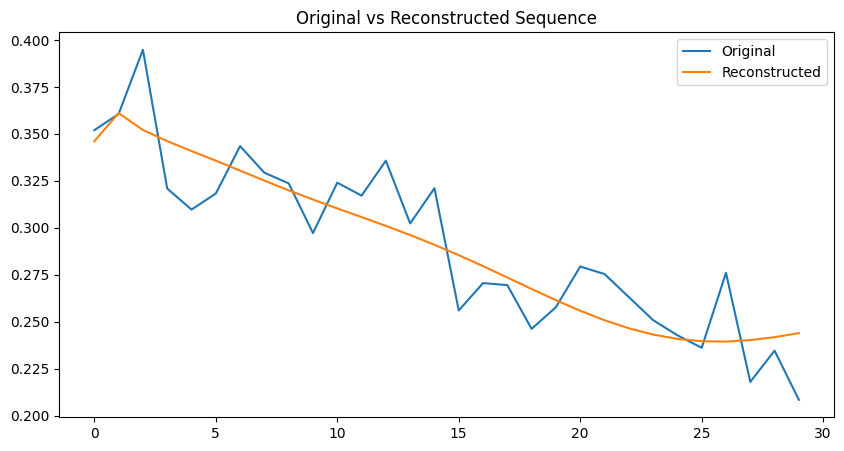

In [12]:
# Compare original and reconstructed sequence
sample_idx = 200  # pick any number between 0 and len(test_data)-1
plt.figure(figsize=(10,5))
plt.plot(test_data[sample_idx], label="Original")
plt.plot(reconstructions[sample_idx], label="Reconstructed")
plt.title("Original vs Reconstructed Sequence")
plt.legend()
plt.show()
